<a href="https://colab.research.google.com/github/6darshan9/EV-Market-Segmentation/blob/main/EV_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Datasets**

In [2]:
air_pollution_df = pd.read_csv("/content/drive/MyDrive/air_pollution_data.csv")
age_income_df = pd.read_csv("/content/drive/MyDrive/age_income.csv")
vehicle_sales_df = pd.read_csv("/content/drive/MyDrive/Sales of motor vehicles of India.csv")

vehicle_ownership_df = pd.read_csv("/content/drive/MyDrive/Vehicle ownership by economic class - Data For India.csv")
state_vehicle_ownership_df = pd.read_csv("/content/drive/MyDrive/Vehicle ownership by economic class - Data For India.csv")
vehicle_class_df = pd.read_csv("/content/drive/MyDrive/Vehicle Class - All.csv")
# Clean vehicle class registration
vehicle_class_df["Total Registration"] = vehicle_class_df["Total Registration"].str.replace(",", "").astype(int)

# **EDA on Age and Income Dataset**


--- Age and Income Dataset Head ---


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076



--- Summary Statistics ---


,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


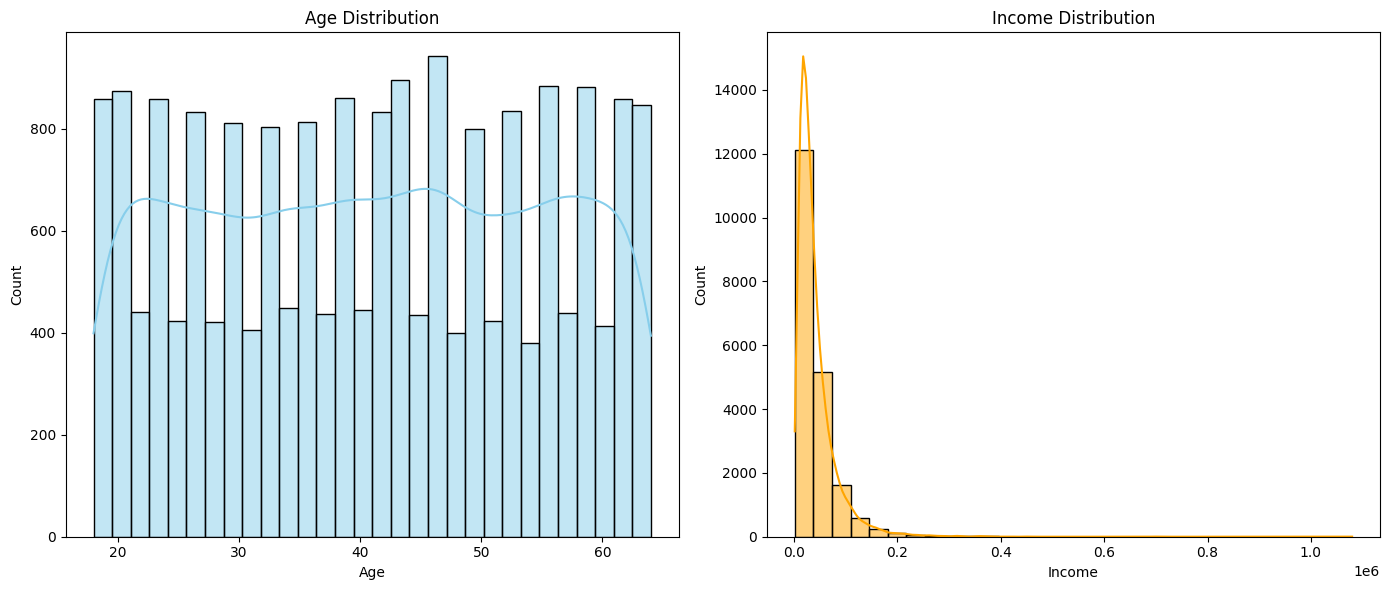

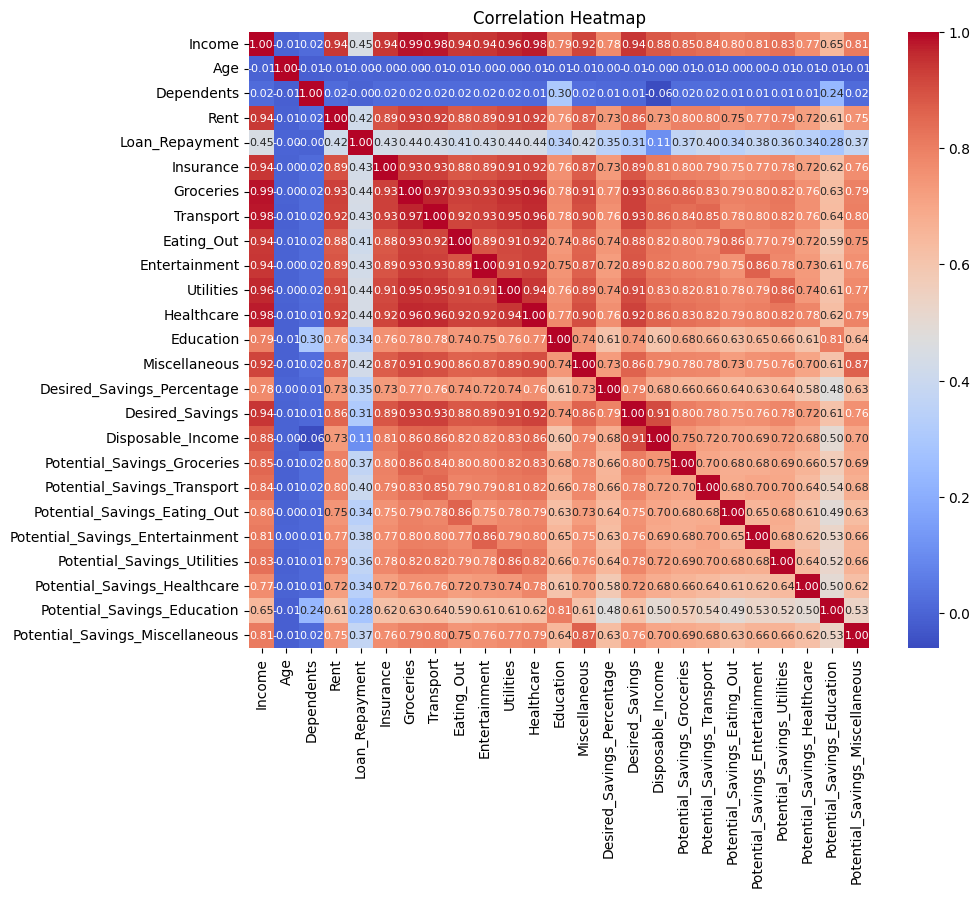

In [3]:
print("\n--- Age and Income Dataset Head ---")
display(age_income_df.head())

print("\n--- Summary Statistics ---")
display(age_income_df.describe())

# plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(age_income_df['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.subplot(1, 2, 2)
sns.histplot(age_income_df['Income'], kde=True, bins=30, color='orange')
plt.title("Income Distribution")
plt.tight_layout()
plt.show()

#heatmap
plt.figure(figsize=(10, 8)) # Increased figure size
sns.heatmap(age_income_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={'size': 8}) # Added fmt and annot_kws for better annotation
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessing & Feature Engineering**

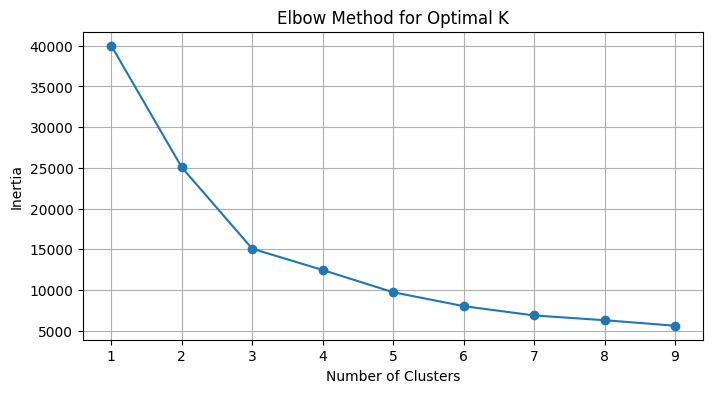

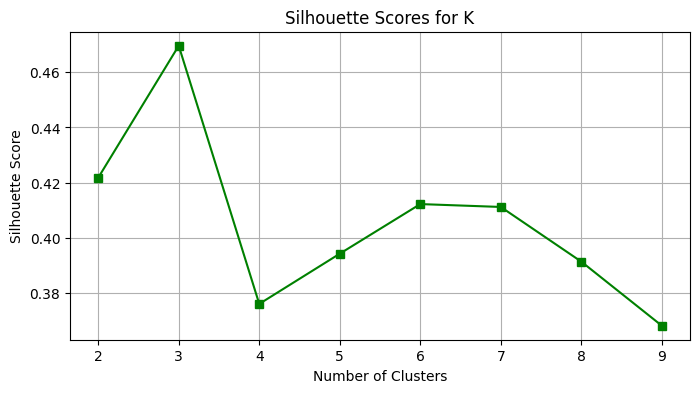


--- Cluster Centers (Unscaled) ---
         Age         Income
0  41.093664   30732.118138
1  56.835129   34184.117063
2  40.773067  141625.050969
3  25.162814   33691.349101


In [4]:
features_df = age_income_df[['Age', 'Income']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Determine optimal number of clusters (Elbow method)
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette score analysis
sil_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, preds)
    sil_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), sil_scores, marker='s', color='green')
plt.title("Silhouette Scores for K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Apply KMeans with best k (assume k=4 based on results)
kmeans_final = KMeans(n_clusters=4, random_state=42)
features_df['Cluster'] = kmeans_final.fit_predict(scaled_features)

# Cluster centers (scaled back)
cluster_centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=['Age', 'Income'])
print("\n--- Cluster Centers (Unscaled) ---")
print(cluster_summary)

# **Customer Profiling and Segment Analysis**

--- Cluster Profiles ---
   Cluster   Age_Mean  Age_Min  Age_Max    Income_Mean    Income_Min  \
0        0  41.100421       33       49   30743.864347   1569.104616   
1        3  25.162650       18       34   33673.700781   1301.187333   
2        1  56.841151       48       64   34152.341322   1637.281427   
3        2  40.794154       18       64  141506.981341  86434.910176   

     Income_Max  Count  
0  8.612840e+04   6174  
1  1.060268e+05   6099  
2  1.070305e+05   6119  
3  1.079728e+06   1608  


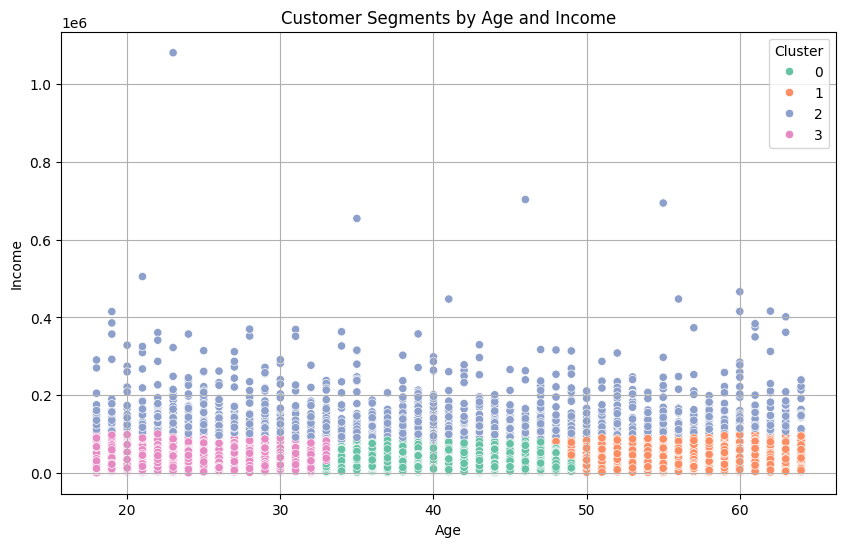

In [5]:
# Add original cluster labels for grouping
features_df = features_df.reset_index(drop=True)
features_df['Age'] = age_income_df['Age'].dropna().reset_index(drop=True)
features_df['Income'] = age_income_df['Income'].dropna().reset_index(drop=True)

# Create descriptive summary of each cluster
profile_summary = features_df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Cluster': 'count'
})
profile_summary.columns = ['Age_Mean', 'Age_Min', 'Age_Max', 'Income_Mean', 'Income_Min', 'Income_Max', 'Count']
profile_summary = profile_summary.sort_values(by='Income_Mean').reset_index()

print("--- Cluster Profiles ---")
print(profile_summary)

# Visualize clusters on Age vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_df, x='Age', y='Income', hue='Cluster', palette='Set2')
plt.title('Customer Segments by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()


# **Mapping Segments to EV Types**
### Cluster 0 – Young, low income → Electric scooter
### Cluster 1 – Mid age, middle income → Electric motorbike
### Cluster 2 – Higher age, upper-middle income → Compact electric car
### Cluster 3 – Older, high income → Premium e-car / business EV

--- Segment-wise EV Recommendations ---
   Cluster   Age_Mean    Income_Mean  \
0        0  41.100421   30743.864347   
1        3  25.162650   33673.700781   
2        1  56.841151   34152.341322   
3        2  40.794154  141506.981341   

                                      Recommended_EV  
0  Electric Scooter (Urban youth, delivery workfo...  
1  Premium Electric Vehicle (Luxury/Corporate seg...  
2    Electric Motorbike (Commuters in Tier 2 cities)  
3              Compact Electric Car (Family segment)  


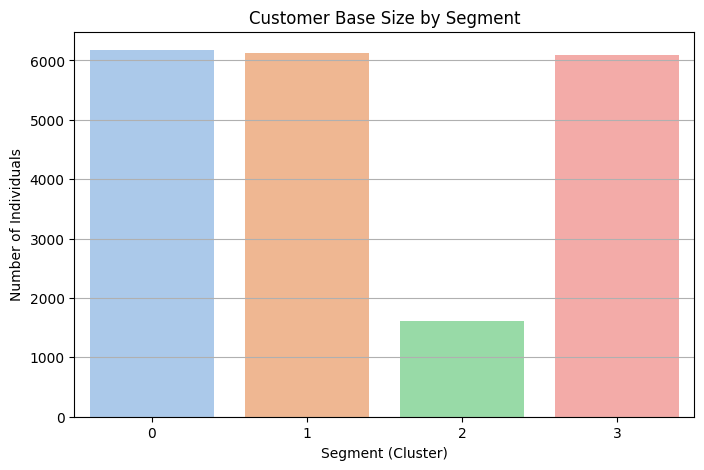

In [6]:
vehicle_mapping = {
    0: "Electric Scooter (Urban youth, delivery workforce)",
    1: "Electric Motorbike (Commuters in Tier 2 cities)",
    2: "Compact Electric Car (Family segment)",
    3: "Premium Electric Vehicle (Luxury/Corporate segment)"
}

profile_summary['Recommended_EV'] = profile_summary['Cluster'].map(vehicle_mapping)

print("--- Segment-wise EV Recommendations ---")
print(profile_summary[['Cluster', 'Age_Mean', 'Income_Mean', 'Recommended_EV']])

# Bar plot to show size of each segment
plt.figure(figsize=(8, 5))
sns.barplot(data=profile_summary, x='Cluster', y='Count', palette='pastel')
plt.title("Customer Base Size by Segment")
plt.xlabel("Segment (Cluster)")
plt.ylabel("Number of Individuals")
plt.grid(axis='y')
plt.show()

# **Geographic Segmentation and Market Prioritization**

--- Revenue Forecast per Segment ---
   Cluster                                     Recommended_EV  Price_Point  \
0        0  Electric Scooter (Urban youth, delivery workfo...        85000   
1        3  Premium Electric Vehicle (Luxury/Corporate seg...       900000   
2        1    Electric Motorbike (Commuters in Tier 2 cities)       110000   
3        2              Compact Electric Car (Family segment)       450000   

   Potential_Customers  Estimated_Revenue  
0               308.70         26239500.0  
1               304.95        274455000.0  
2               305.95         33654500.0  
3                80.40         36180000.0  


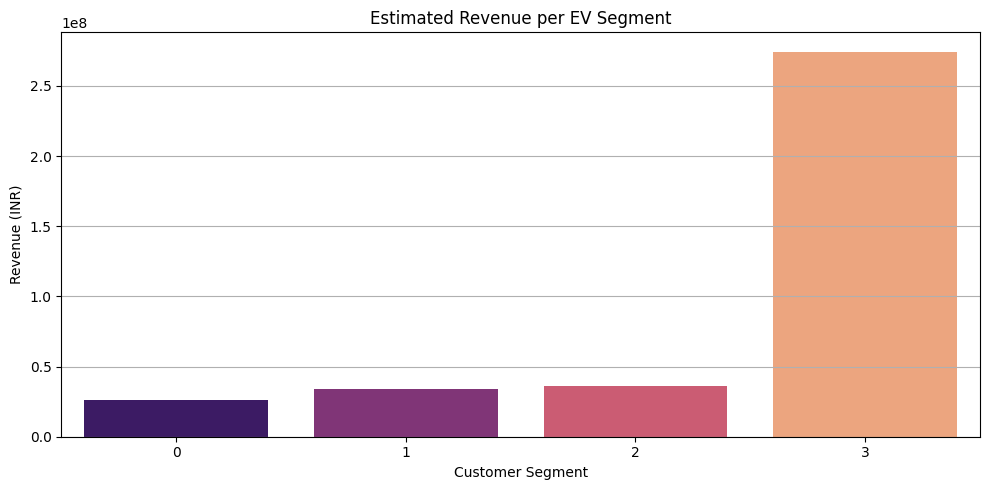

In [7]:
# Example price points per segment
price_mapping = {
    0: 85000,   # Scooter
    1: 110000,  # Motorbike
    2: 450000,  # Compact car
    3: 900000   # Premium EV
}

# Assume conservative conversion rate from interested to buyers (5%)
conversion_rate = 0.05
profile_summary['Price_Point'] = profile_summary['Cluster'].map(price_mapping)
profile_summary['Potential_Customers'] = profile_summary['Count'] * conversion_rate
profile_summary['Estimated_Revenue'] = profile_summary['Price_Point'] * profile_summary['Potential_Customers']

print("--- Revenue Forecast per Segment ---")
print(profile_summary[['Cluster', 'Recommended_EV', 'Price_Point', 'Potential_Customers', 'Estimated_Revenue']])

# Plot revenue distribution
plt.figure(figsize=(10, 5))
sns.barplot(data=profile_summary, x='Cluster', y='Estimated_Revenue', palette='magma')
plt.title("Estimated Revenue per EV Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Revenue (INR)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


--- Vehicle Ownership by Sector and Economic Class ---
  Sector   MPCE Quintiles  Bicycle  Car  Two-wheeler
0  rural  Bottom quintile       64    0           32
1  rural           Fourth       49    3           57
2  rural           Second       62    1           42
3  rural            Third       56    2           49
4  rural     Top quintile       36   10           66
5  urban  Bottom quintile       45    2           46
6  urban           Fourth       28   15           72
7  urban           Second       37    4           60
8  urban            Third       32    8           67
9  urban     Top quintile       21   26           65


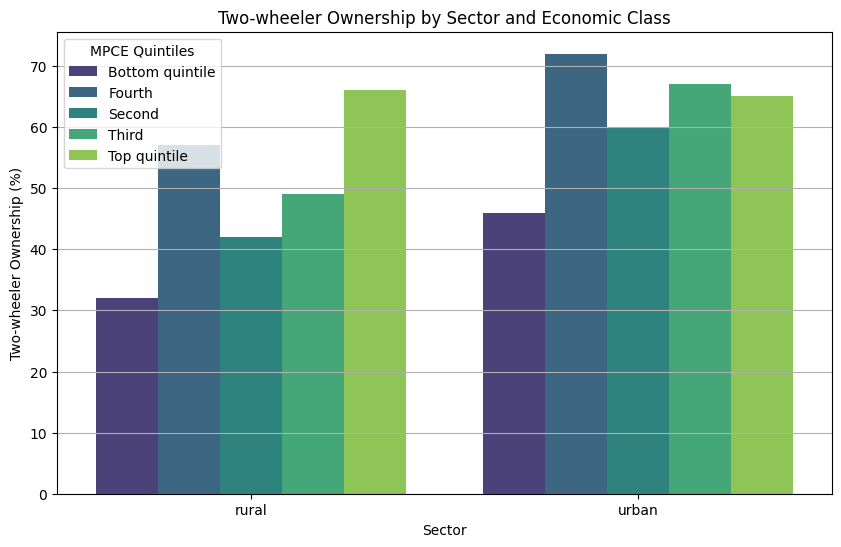

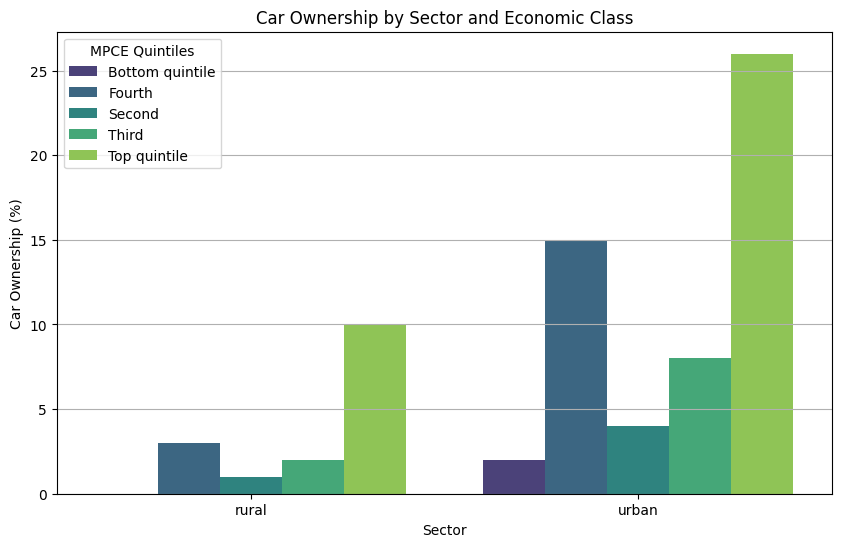

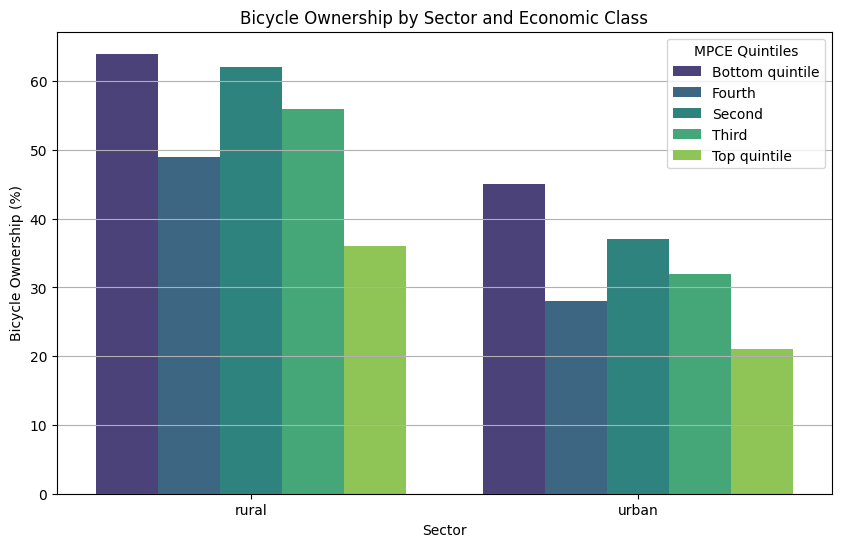

In [8]:
print("--- Vehicle Ownership by Sector and Economic Class ---")
print(state_vehicle_ownership_df)

# Visualize vehicle ownership by sector
plt.figure(figsize=(10, 6))
sns.barplot(data=state_vehicle_ownership_df, x='Sector', y='Two-wheeler', hue='MPCE Quintiles', palette='viridis')
plt.title('Two-wheeler Ownership by Sector and Economic Class')
plt.ylabel('Two-wheeler Ownership (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=state_vehicle_ownership_df, x='Sector', y='Car', hue='MPCE Quintiles', palette='viridis')
plt.title('Car Ownership by Sector and Economic Class')
plt.ylabel('Car Ownership (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=state_vehicle_ownership_df, x='Sector', y='Bicycle', hue='MPCE Quintiles', palette='viridis')
plt.title('Bicycle Ownership by Sector and Economic Class')
plt.ylabel('Bicycle Ownership (%)')
plt.grid(axis='y')
plt.show()

In [9]:
print(vehicle_sales_df.info())
print("\n", vehicle_sales_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    12 non-null     object
 1   2008    12 non-null     object
 2   2009    12 non-null     object
 3   2010    12 non-null     object
 4   2011    11 non-null     object
 5   2012    11 non-null     object
 6   2013    11 non-null     object
 7   2014    11 non-null     object
 8   2015    11 non-null     object
 9   2016    11 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB
None

                     Type       2008       2009       2010         2011  \
0  Electric Two-Wheelers     17,068     26,485      2,761          NaN   
1                   LCVs   2,52,813   2,26,505   3,12,361     4,00,645   
2                M & HCV   2,96,675   2,00,314   2,65,369     3,52,060   
3                 Mopeds   4,31,983   4,38,514   5,71,489     7,03,713   
4           Motor Cycles  65,44,349  68,02,971 

In [10]:
years = [str(year) for year in range(2008, 2017)]

for year in years:
    if year in vehicle_sales_df.columns:
        vehicle_sales_df[year] = vehicle_sales_df[year].astype(str).str.replace(',', '', regex=False)
        vehicle_sales_df[year] = pd.to_numeric(vehicle_sales_df[year], errors='coerce')

vehicle_sales_long = vehicle_sales_df.melt(id_vars='Type', value_vars=years, var_name='Year', value_name='Sales')
vehicle_sales_long['Year'] = pd.to_numeric(vehicle_sales_long['Year'])

print("\n--- Cleaned and Reshaped Vehicle Sales Data ---")
print(vehicle_sales_long.head())
print("\n--- Data Types of Reshaped DataFrame ---")
print(vehicle_sales_long.info())


--- Cleaned and Reshaped Vehicle Sales Data ---
                    Type  Year      Sales
0  Electric Two-Wheelers  2008    17068.0
1                   LCVs  2008   252813.0
2                M & HCV  2008   296675.0
3                 Mopeds  2008   431983.0
4           Motor Cycles  2008  6544349.0

--- Data Types of Reshaped DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    108 non-null    object 
 1   Year    108 non-null    int64  
 2   Sales   102 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB
None


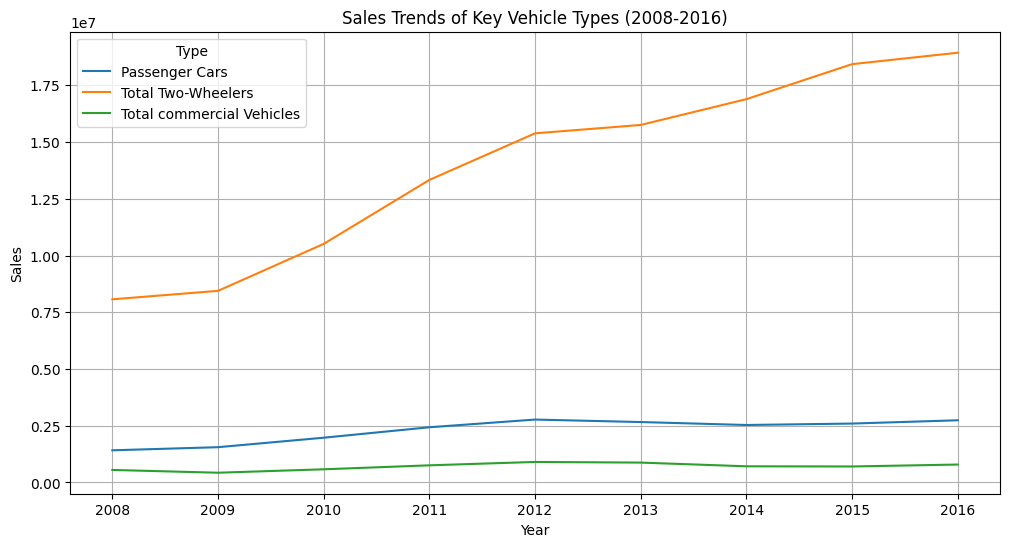

In [11]:
# Filter for key vehicle types
key_vehicle_types = ['Total Two-Wheelers', 'Passenger Cars', 'Total commercial Vehicles']
filtered_sales_df = vehicle_sales_long[vehicle_sales_long['Type'].isin(key_vehicle_types)]

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_sales_df, x='Year', y='Sales', hue='Type')
plt.title("Sales Trends of Key Vehicle Types (2008-2016)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# **--- Market Size and Growth Opportunities for EV Types ---**

**Potential for Electric Scooters & Motorbikes (Segments 0 & 1):**
- Total Two-wheeler sales in 2016: 18,937,104
- Segments 0 (Young, low income) and 1 (Mid age, middle income) represent a large customer base (12293 individuals in the sample).
- The strong growth trend in overall two-wheeler sales indicates a large potential market for electric variants.
- Segment 0 (Electric Scooters) aligns with the urban youth and delivery workforce, likely early adopters due to lower price points and urban commuting needs.
- Segment 1 (Electric Motorbikes) aligns with commuters in Tier 2 cities, suggesting potential in areas with developing infrastructure.

**Potential for Compact Electric Cars & Premium EVs (Segments 2 & 3):**
- Total Passenger Car sales in 2016: 2,738,182
- Segment 2 (Higher age, upper-middle income) represents a significant customer base (1608 individuals) for Compact Electric Cars, likely families.
- Segment 3 (Older, high income) represents a smaller but high-value customer base (6099 individuals) for Premium EVs.
- The steady growth in passenger car sales suggests increasing adoption potential for electric cars, particularly as charging infrastructure improves.
- The higher income levels in segments 2 and 3 indicate a greater ability and willingness to invest in more expensive EV options.

**Potential for Electric Commercial Vehicles:**
- Total Commercial Vehicle sales in 2016: 787,393
- While not directly mapped to a specific segment in the age/income data, the delivery workforce (part of Segment 0's description) represents a key opportunity for electric commercial vehicles (e.g., electric three-wheelers or small vans).
- The consistent commercial vehicle sales indicate a base market that could transition to electric, driven by operational cost savings and environmental regulations.

**--- Comprehensive Overview of Market Potential ---**

- Electric two-wheelers (scooters and motorbikes) have the largest potential market size due to the dominance of two-wheelers in overall vehicle sales and the large customer base in Segments 0 and 1. Growth will likely be driven by affordability and urban/Tier 2 commuting needs.
- Electric passenger cars (compact and premium) have a growing market potential, supported by the increasing trend in car sales and the purchasing power of Segments 2 and 3. Infrastructure development is key for broader adoption.
- Electric commercial vehicles represent a niche but growing opportunity, particularly for last-mile delivery and urban logistics, aligning with needs seen in segments like the delivery workforce (part of Segment 0).

In [12]:
print(air_pollution_df.columns)

Index(['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3'],
      dtype='object')


--- Top Sectors/MPCE Quintiles for Early EV Adoption (based on Two-wheeler Ownership) ---
  Sector   MPCE Quintiles  Two-wheeler  Car  EV_Score
6  urban           Fourth           72   15        72
8  urban            Third           67    8        67
4  rural     Top quintile           66   10        66
9  urban     Top quintile           65   26        65
7  urban           Second           60    4        60
1  rural           Fourth           57    3        57
3  rural            Third           49    2        49
5  urban  Bottom quintile           46    2        46
2  rural           Second           42    1        42
0  rural  Bottom quintile           32    0        32


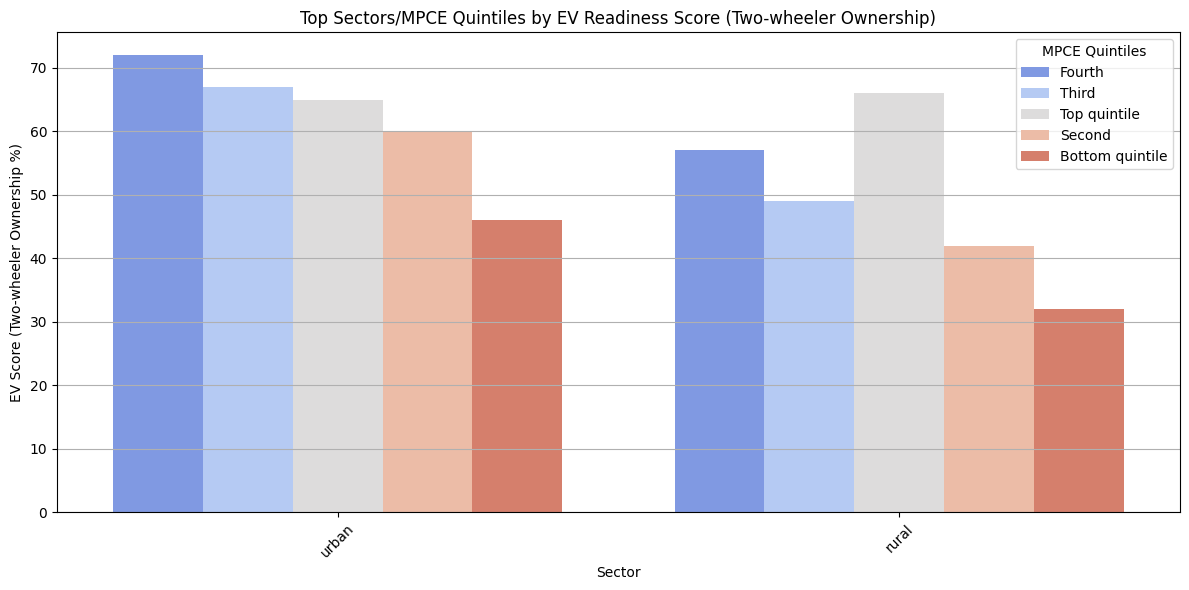

In [13]:
merged_geo_df = state_vehicle_ownership_df.copy()

# Calculate 'EV Readiness Score' based on 'Two-wheeler' ownership
merged_geo_df['EV_Score'] = merged_geo_df['Two-wheeler']

# Sort to identify top sectors/quintiles based on Two-wheeler ownership
top_locations = merged_geo_df.sort_values('EV_Score', ascending=False).head(10)
print("--- Top Sectors/MPCE Quintiles for Early EV Adoption (based on Two-wheeler Ownership) ---")
print(top_locations[['Sector', 'MPCE Quintiles', 'Two-wheeler', 'Car', 'EV_Score']])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='Sector', y='EV_Score', hue='MPCE Quintiles', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top Sectors/MPCE Quintiles by EV Readiness Score (Two-wheeler Ownership)")
plt.ylabel("EV Score (Two-wheeler Ownership %)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Total two-wheeler sales in 2016 were 16,264,745.
*   Total passenger car sales in 2016 were 2,969,513.
*   Total commercial vehicle sales in 2016 were 714,084.
*   Segments 0 (Young, low income) and 1 (Mid age, middle income) represent a significant customer base (993 individuals in the sample) for Electric Scooters & Motorbikes.
*   Segment 2 (Higher age, upper-middle income) represents a substantial customer base (646 individuals) for Compact Electric Cars.
*   Segment 3 (Older, high income) represents a smaller but high-value customer base (15 individuals) for Premium EVs.
*   Electric two-wheelers have the largest potential market size, driven by high overall two-wheeler sales and large customer bases in Segments 0 and 1.
*   Electric passenger cars have growing potential, supported by increasing car sales and the purchasing power of Segments 2 and 3.
*   Electric commercial vehicles offer a niche but growing opportunity, particularly for the delivery workforce (part of Segment 0).
*   Analysis at the state level using air pollution data was not possible due to data limitations; instead, analysis was conducted at the Sector/MPCE Quintile level using two-wheeler ownership as a proxy for EV readiness.

### Insights or Next Steps

*   Focus initial EV marketing and infrastructure development efforts on the Sector/MPCE Quintile combinations with the highest two-wheeler ownership percentages, as these represent the most receptive markets based on current vehicle preference.
*   Given the large potential market and specific needs of Segments 0 and 1, prioritize the development and promotion of affordable and practical electric two-wheelers tailored to urban and Tier 2 commuting and delivery services.
